In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Load and store the Signals into a pandas dataframe
Signal1 = pd.read_csv("signal1.csv",header=None)
Signal2 = pd.read_csv("signal2.csv",header=None)
Signal3 = pd.read_csv("signal3.csv",header=None)
Signal4 = pd.read_csv("signal4.csv",header=None)
Signal5 = pd.read_csv("signal5.csv",header=None)
Signal6 = pd.read_csv("signal6.csv",header=None)
Signal_Dataframe = pd.concat([Signal1,Signal2,Signal3,Signal4,Signal5,Signal6],axis=1,ignore_index=True)

In [3]:
#Load and store the jumps into a pandas dataframe
Jump1 = pd.read_csv("jump1.csv",header=None)
Jump2 = pd.read_csv("jump2.csv",header=None)
Jump3 = pd.read_csv("jump3.csv",header=None)
Jump4 = pd.read_csv("jump4.csv",header=None)
Jump5 = pd.read_csv("jump5.csv",header=None)
Jump6 = pd.read_csv("jump6.csv",header=None)
Jump_Dataframe = pd.concat([Jump1,Jump2,Jump3,Jump4,Jump5,Jump6],axis=1,ignore_index=True)

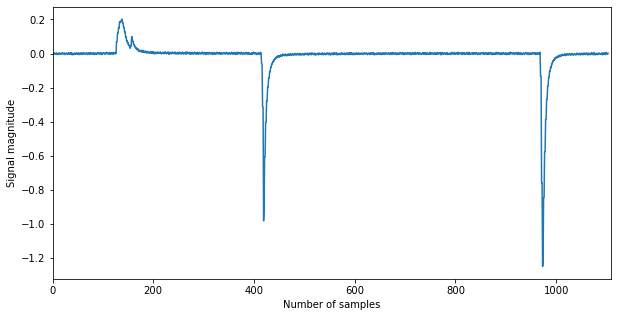

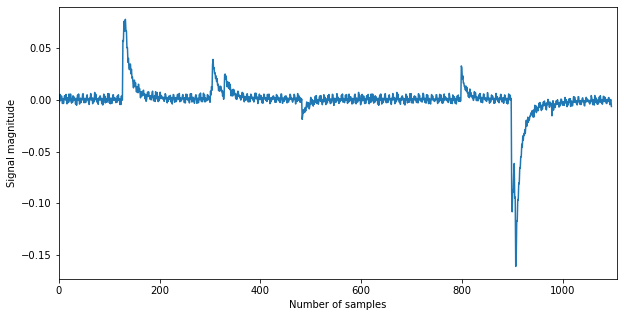

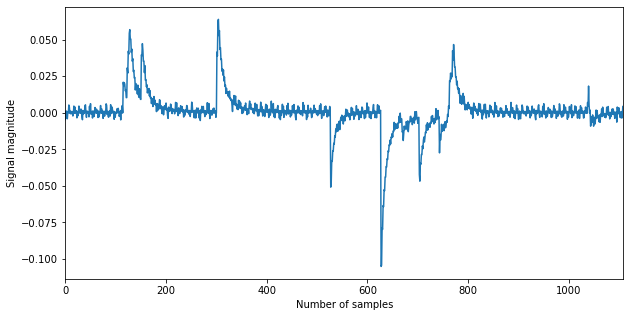

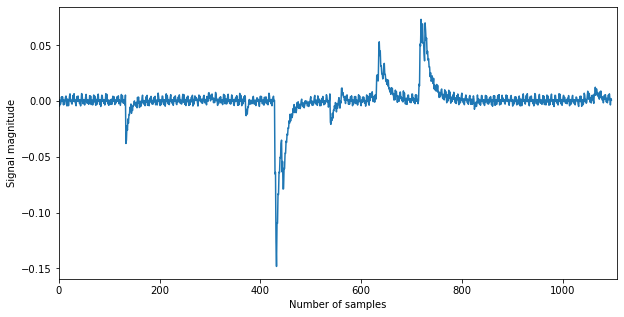

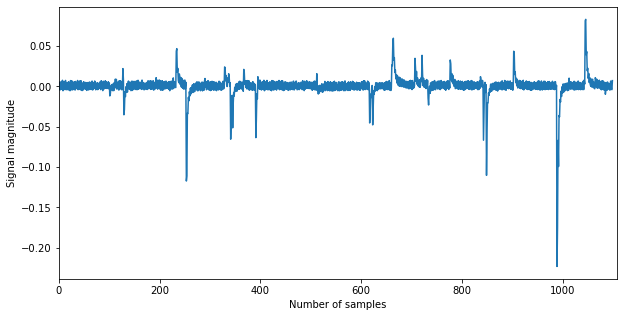

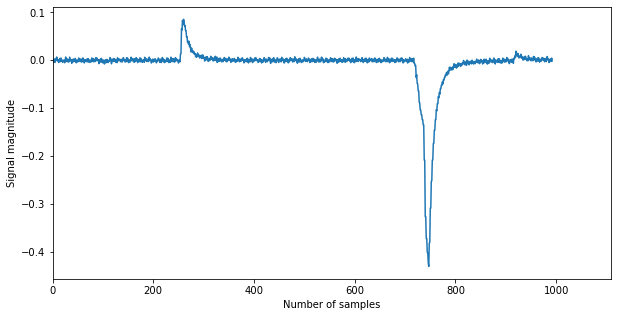

In [4]:
figs = {}
axs = {}
for i in range(Signal_Dataframe.shape[1]):
    figs[i] = plt.figure(figsize=(10,5))
    axs[i] =figs[i].add_subplot(111)
    axs[i].plot(Signal_Dataframe[i])  
    axs[i].set_xlim(0,Signal_Dataframe[i].shape[0])
    axs[i].set_ylabel('Signal magnitude')
    axs[i].set_xlabel('Number of samples')   

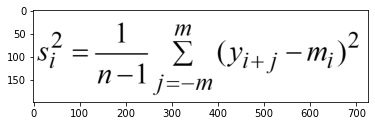

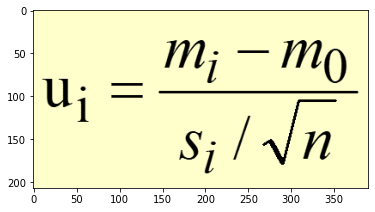

In [5]:
image = mpimg.imread("variancecomparison.png")
plt.imshow(image)
plt.show()
image = mpimg.imread("meancomparison.png")
plt.imshow(image)
plt.show()

In [6]:
def anomaly_detection(signal,threshold,windowsize):
    X = signal[:60]
    mean_flux0 = np.mean(X)
    #decision_mean = []
    decision_mean = np.zeros(signal.shape[0])
    time = []
    mean_comparison = []
    for window in range(windowsize,signal.shape[0]+1):
        a = (np.mean(signal[window-window_size:window]) - mean_flux0)
        b = (np.std(signal[window-window_size:window]))/(np.sqrt(window_size))
        u = a/b
        mean_comparison.append(u)
        if ((u >= threshold) | (u <= -threshold)): #threshold
            #decision_mean.append(1)
            decision_mean[window-window_size] = 1
            time.append(window - int(window_size/2)) 
        else:
            #decision_mean.append(0)
            decision_mean[window-window_size] = 0
            
    return decision_mean, mean_comparison,time

In [7]:
signal = Signal_Dataframe[0]  # 6 signals (0...5)
threshold = 3
window_size = 20
decision_mean,mean_comparison,time = anomaly_detection(signal,threshold,window_size)

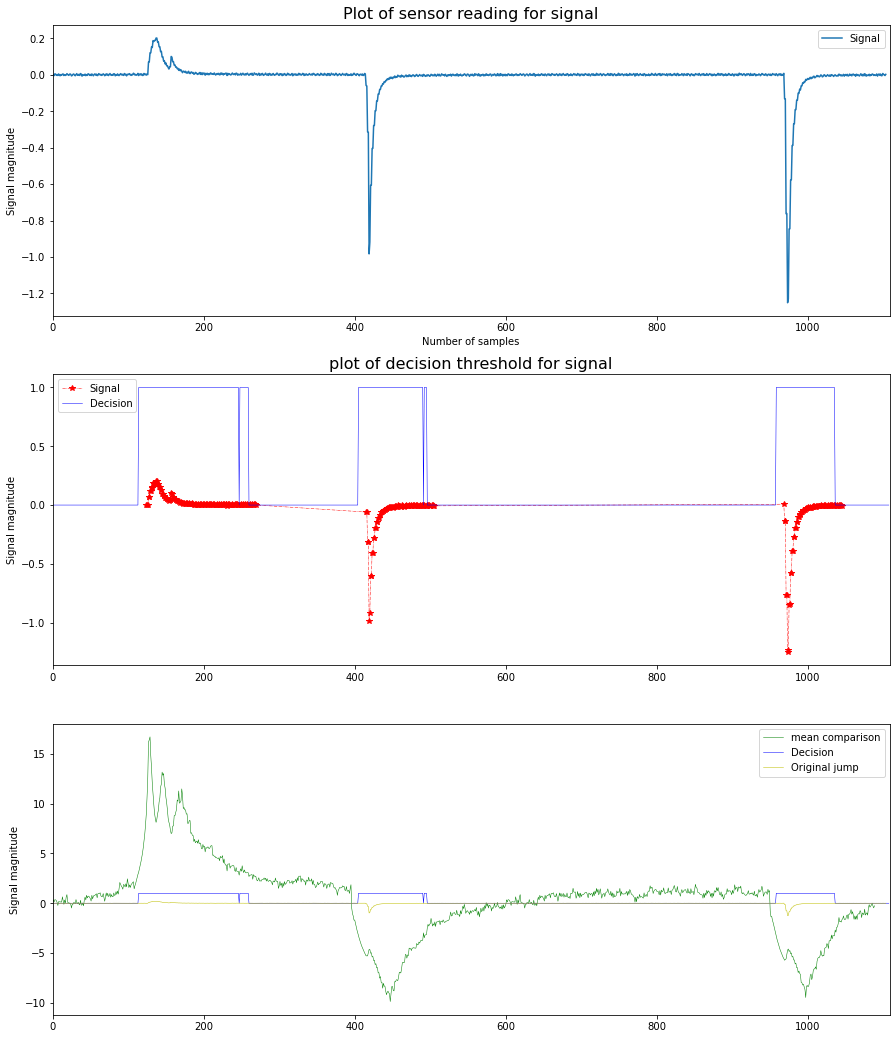

In [12]:
fig,axs = plt.subplots(3,1,figsize=(15,10))
axs = axs.reshape(-1)
axs[0].plot(signal,label='Signal')
axs[0].set_xlim(0,signal.shape[0])
axs[0].set_xlabel('Number of samples')
axs[0].set_ylabel('Signal magnitude')
axs[0].legend(loc=0)
axs[0].set_title('Plot of sensor reading for signal', fontsize=16)

axs[1].plot(time,signal[time],'-.*',color='r',linewidth=0.5,label='Signal')
axs[1].plot(decision_mean,color='b',linewidth=0.5,label='Decision')
axs[1].set_xlim(0,signal.shape[0])
axs[1].set_ylabel('Signal magnitude')
axs[1].legend(loc=0)
axs[1].set_title('plot of decision threshold for signal', fontsize=16)

axs[2].plot(mean_comparison,color='g',linewidth=0.5,label='mean comparison')
axs[2].plot(decision_mean,color='b',linewidth=0.5,label='Decision')
axs[2].plot(signal,color='y',linewidth=0.5,label='Original jump')
axs[2].set_xlim(0,signal.shape[0])
axs[2].set_ylabel('Signal magnitude')
axs[2].legend(loc=0)
plt.subplots_adjust( top = 1.5 )
plt.show()


In [83]:
#implement testing algorithm

A = 0
B = 0
for signal_num in range(0,Jump_Dataframe.shape[1]):
    totL0 = np.count_nonzero(Jump_Dataframe[signal_num] == 0)
    A += totL0
    totL1 = np.count_nonzero(Jump_Dataframe[signal_num] == 1)
    B += totL1
for signal_num in range(0,Signal_Dataframe.shape[1]):
    C = 0
    D = 0
    for threshold in np.arange(0,5.5,0.5):
        decision_mean,mean_comparison,time = anomaly_detection(
            signal= Signal_Dataframe[signal_num],threshold=threshold,windowsize=20)
        true_pos = np.count_nonzero((
            Jump_Dataframe[signal_num] == 1) & (np.array(decision_mean) == 1))
        C += true_pos
        false_neg = np.count_nonzero((
            Jump_Dataframe[signal_num] == 0) & (np.array(decision_mean) == 1))
        

/Users/edwardquarm/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
